## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
sns.__version__

'0.13.2'

In [4]:
# Tell Python to remember a main folder path
path = r'C:\Users\Frederick\Documents\CareerFoundry\CF - Data Analytics Immersion\Achievement6\05-2024 World Happiness Report'

In [5]:
# import 2019 data

df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','2019_checked.csv'), index_col = False)

### 2. Data cleaning

In [6]:
df.columns

Index(['Unnamed: 0', 'Overall rank', 'Country or region', 'Score',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [7]:
df.head(20)

,Unnamed: 0,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [8]:
df.shape

(156, 10)

##### Missing values

In [9]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Unnamed: 0                      0
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

##### Duplicates check

In [10]:
dups = df.duplicated()

In [11]:
dups.shape # No dups

(156,)

##### Extreme values checks

C:\Users\Frederick\AppData\Local\Temp\ipykernel_7012\3121644600.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Score'], bins=25) # Shows extreme values


<Axes: xlabel='Score', ylabel='Density'>

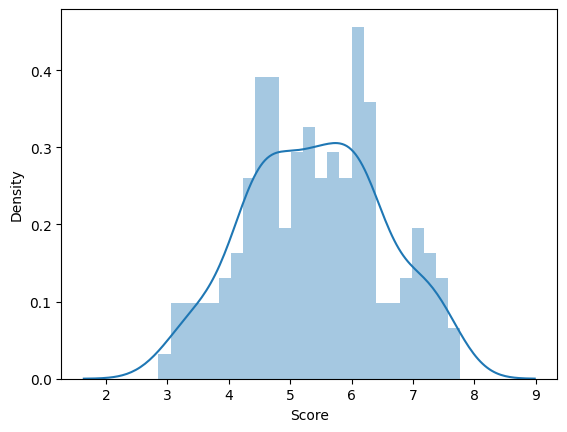

In [12]:
sns.distplot(df['Score'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [13]:
df['Score'].mean() # Check the mean

5.407096153846155

In [14]:
df['Score'].median() # Check the median

5.3795

In [15]:
df['Score'].max() # Check the max

7.769

### 3. Data prep for regression analysis 

## Hypothesis: The perception of corruption in a region has no impact on the Happiness Score of that region.

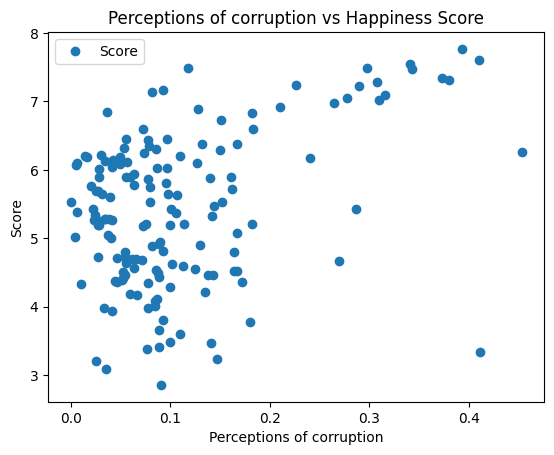

In [16]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Perceptions of corruption', y='Score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Perceptions of corruption vs Happiness Score')  
plt.xlabel('Perceptions of corruption')  
plt.ylabel('Score')  
plt.show()

In [17]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Perceptions of corruption'].values.reshape(-1,1)
y = df['Score'].values.reshape(-1,1)

In [18]:
X

array([[0.393],
       [0.41 ],
       [0.341],
       [0.118],
       [0.298],
       [0.343],
       [0.373],
       [0.38 ],
       [0.308],
       [0.226],
       [0.29 ],
       [0.093],
       [0.082],
       [0.316],
       [0.278],
       [0.31 ],
       [0.265],
       [0.21 ],
       [0.128],
       [0.036],
       [0.182],
       [0.151],
       [0.073],
       [0.183],
       [0.097],
       [0.056],
       [0.078],
       [0.132],
       [0.167],
       [0.079],
       [0.054],
       [0.086],
       [0.15 ],
       [0.453],
       [0.074],
       [0.03 ],
       [0.11 ],
       [0.014],
       [0.016],
       [0.05 ],
       [0.24 ],
       [0.042],
       [0.034],
       [0.057],
       [0.127],
       [0.006],
       [0.05 ],
       [0.005],
       [0.041],
       [0.087],
       [0.097],
       [0.028],
       [0.064],
       [0.056],
       [0.161],
       [0.028],
       [0.06 ],
       [0.14 ],
       [0.078],
       [0.096],
       [0.064],
       [0.02 ],
       [

In [19]:
y

array([[7.769],
       [7.6  ],
       [7.554],
       [7.494],
       [7.488],
       [7.48 ],
       [7.343],
       [7.307],
       [7.278],
       [7.246],
       [7.228],
       [7.167],
       [7.139],
       [7.09 ],
       [7.054],
       [7.021],
       [6.985],
       [6.923],
       [6.892],
       [6.852],
       [6.825],
       [6.726],
       [6.595],
       [6.592],
       [6.446],
       [6.444],
       [6.436],
       [6.375],
       [6.374],
       [6.354],
       [6.321],
       [6.3  ],
       [6.293],
       [6.262],
       [6.253],
       [6.223],
       [6.199],
       [6.198],
       [6.192],
       [6.182],
       [6.174],
       [6.149],
       [6.125],
       [6.118],
       [6.105],
       [6.1  ],
       [6.086],
       [6.07 ],
       [6.046],
       [6.028],
       [6.021],
       [6.008],
       [5.94 ],
       [5.895],
       [5.893],
       [5.89 ],
       [5.888],
       [5.886],
       [5.86 ],
       [5.809],
       [5.779],
       [5.758],
       [

In [20]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [21]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [22]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

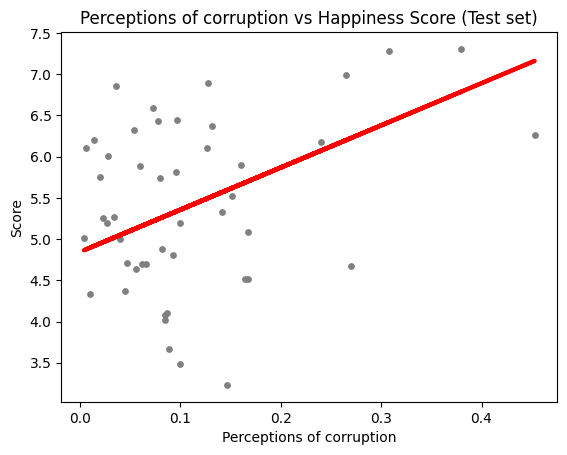

In [24]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Perceptions of corruption vs Happiness Score (Test set)')
plot_test.xlabel('Perceptions of corruption')
plot_test.ylabel('Score')
plot_test.show()

Interpretation :  We see that in the majority of the regions where there is a low perception of corruption that there is a middle to high Happiness score, so we could conclude that the corruption perception has an influence on the Happiness Score. 

In [25]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [26]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[5.11823339]]
Mean squared error:  0.9534495657105875
R2 score:  0.06315507042831225


In [27]:
y_predicted

array([[5.24316211],
       [5.66797548],
       [4.91559518],
       [5.13056098],
       [5.34040855],
       [6.7888686 ],
       [4.87464931],
       [5.08449688],
       [5.28922621],
       [6.07231592],
       [4.98213221],
       [4.98725044],
       [5.16127038],
       [5.69868488],
       [5.15103391],
       [5.35576325],
       [7.16249963],
       [5.68333018],
       [5.49395555],
       [5.07426041],
       [5.29946268],
       [6.42035579],
       [5.27898975],
       [5.33529031],
       [6.22586292],
       [5.59632022],
       [4.96165928],
       [5.25339858],
       [5.01795984],
       [5.69868488],
       [6.20027176],
       [5.02819631],
       [4.89512224],
       [5.04866924],
       [5.21757095],
       [5.57072905],
       [5.26363505],
       [5.31993561],
       [5.35576325],
       [5.51954672],
       [5.18174331],
       [5.27898975],
       [4.86441284],
       [5.49907378],
       [4.94630458],
       [5.12032451],
       [5.62191138]])

In [28]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,6.436,5.243162
1,5.893,5.667975
2,6.198,4.915595
3,4.639,5.130561
4,6.446,5.340409
5,7.307,6.788869
6,6.100,4.874649
7,4.707,5.084497
8,4.107,5.289226
9,6.174,6.072316


##### Compare how the regression fits the training set

In [29]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [30]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [31]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[5.11823339]]
Mean squared error:  1.0930732401252314
R2 score:  0.1738224403243841


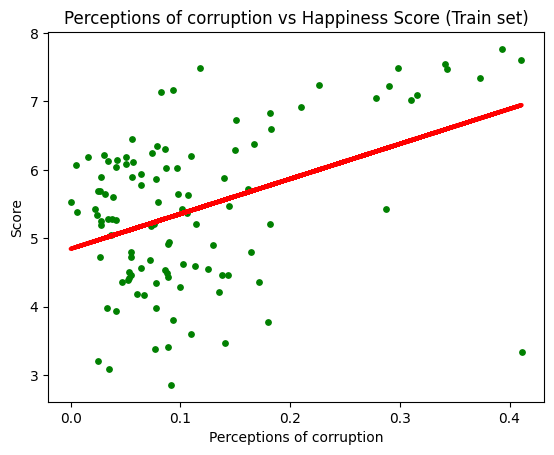

In [32]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Perceptions of corruption vs Happiness Score (Train set)')
plot_test.xlabel('Perceptions of corruption')
plot_test.ylabel('Score')
plot_test.show()

The model really performed well, but there could be some bias, because the lack of perception of corruption, doesn't always mean a higher Happiness Score.